In [2]:
import pandas as pd
import datetime
import numpy as np

In [3]:
# volume data 가져오기
df_vol = pd.read_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/volume_data.xlsx', header=[0,1], index_col=0, engine='openpyxl')
df_vol.columns.names = ["ticker",'variable']
# 구조: ticker - name - variable
# 거래량(주)	평균발행주식수 (보통)(주)	매수수량(기관계)(주)	매도수량(기관계)(주)	매수수량(개인)(주)	매도수량(개인)(주)	매수수량(외국인계)(주)	매도수량(외국인계)(주)
df_vol.index = pd.to_datetime(df_vol.index) # 날짜 형식 변경

In [4]:
# value(거래대금) data 가져오기
# 거래대금(원)	매수대금(기관계)(만원)	매도대금(기관계)(만원)	매수대금(개인)(만원)	매도대금(개인)(만원)	매수대금(외국인계)(만원)	매도대금(외국인계)(만원)
df_val = pd.read_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/volume_value_data.xlsx', header=[0,1], index_col=0, engine='openpyxl')
df_val.columns.names = ["ticker",'variable']
df_val.index = pd.to_datetime(df_val.index)     # 날짜 형식 변경

In [5]:
df_val

ticker             005930                                           \
variable          거래대금(원) 매수대금(기관계)(만원) 매도대금(기관계)(만원) 매수대금(개인)(만원)   
2011-01-03   254246714088     8475469.0     7813990.0    4385394.0   
2011-01-04   262306047000     5465586.0     8342228.0    5547111.0   
2011-01-05   317985957175     5199941.0    13004658.0    9404192.0   
2011-01-06   362159209184     8518403.0     7710061.0   14410335.0   
2011-01-07   426406379706     7868983.0    12492904.0   18498625.0   
...                   ...           ...           ...          ...   
2021-12-24   973661791400    60218721.0    29845580.0   22498223.0   
2021-12-27   864327041000    43250993.0    30232615.0   24854227.0   
2021-12-28  1458198874200    88460590.0    35023401.0   39915646.0   
2021-12-29  1569040228400    55974497.0   104231057.0   85832330.0   
2021-12-30  1120743115800    43396019.0    66950696.0   38084813.0   

ticker                                                 373220                \
variable   매도대금(개인)(만원) 매수대금(외국인계)(만원) 매도대금(외국인계)(만원) 거래대금(원) 매수대금(기관계)(만원)   
2011-01-03    5792784.0     11555685.0      9981181.0     NaN           NaN   
2011-01-04    5037450.0     14657542.0      8954490.0     NaN           NaN   
2011-01-05    6876678.0     14682977.0     10482361.0     NaN           NaN   
2011-01-06    7568684.0     11532446.0     18167119.0     NaN           NaN   
2011-01-07    8418765.0     12890215.0     20143359.0     NaN           NaN   
...                 ...            ...            ...     ...           ...   
2021-12-24   56675286.0     11944040.0      8679551.0     NaN           NaN   
2021-12-27   43576458.0     10552173.0     10036450.0     NaN           NaN   
2021-12-28   99074369.0     14428883.0      8827334.0     NaN           NaN   
2021-12-29   40311458.0     13548974.0     10931497.0     NaN           NaN   
2021-12-30   19403991.0     29118528.0     24407253.0     NaN           NaN   

ticker                    ...       145210                                \
variable   매도대금(기관계)(만원)  ... 매도대금(개인)(만원) 매수대금(외국인계)(만원) 매도대금(외국인계)(만원)   
2011-01-03           NaN  ...          NaN            NaN            NaN   
2011-01-04           NaN  ...          NaN            NaN            NaN   
2011-01-05           NaN  ...          NaN            NaN            NaN   
2011-01-06           NaN  ...          NaN            NaN            NaN   
2011-01-07           NaN  ...          NaN            NaN            NaN   
...                  ...  ...          ...            ...            ...   
2021-12-24           NaN  ...      74347.0         3463.0         5255.0   
2021-12-27           NaN  ...      97058.0        12068.0         3852.0   
2021-12-28           NaN  ...      59593.0        11702.0         5521.0   
2021-12-29           NaN  ...      52570.0        13278.0         7450.0   
2021-12-30           NaN  ...      24891.0         3384.0         5413.0   

ticker           030790                                                        \
variable        거래대금(원) 매수대금(기관계)(만원) 매도대금(기관계)(만원) 매수대금(개인)(만원) 매도대금(개인)(만원)   
2011-01-03    331239510           NaN           NaN      31294.0      33115.0   
2011-01-04    325675400           NaN           NaN      31957.0      32157.0   
2011-01-05    229549005           NaN           NaN      22528.0      22429.0   
2011-01-06    303517770           NaN           NaN      29845.0      29138.0   
2011-01-07    260016640           NaN           NaN      24056.0      26002.0   
...                 ...           ...           ...          ...          ...   
2021-12-24  52088228870       14264.0       14985.0    4963791.0    4933338.0   
2021-12-27  52939281635        7935.0         334.0    5111765.0    5112011.0   
2021-12-28   4944507095        3583.0           0.0     480987.0     485598.0   
2021-12-29   3362409100        3537.0        3596.0     328327.0     324430.0   
2021-12-30   3906348290        3631.0           0.0     375391.0     390139.0   

ticker            

In [23]:
# 두 df 합치기
df_vol = pd.concat([df_vol, df_val], axis=1)
df_vol.sort_index(axis=1, inplace=True)         # col index 정렬 -> loc 오류 방지

In [24]:
# controversies data 가져오기
df = pd.read_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV.xlsx', engine='openpyxl') #일자, 기업
df['일자'] = pd.to_datetime(df['일자']) # 날짜 형식 변경

# kospi volume data 가져오기
# date - ror - vol
df_kospi_vol = pd.read_csv('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/data/KOSPI_vol.csv', encoding='cp949')
df_kospi_vol['date'] = pd.to_datetime(df_kospi_vol['date']) # 날짜 형식 변경

In [25]:
df

,일자,제목,본문,기업,ESG,중복 횟수,중복 횟수(10일)
0,2018-06-04,"BGF, SK '헬로네이처' 경영권 인수 온라인 신선식품 출사표","[머니투데이 김태현 기자] [BGF, 헬로네이처 지분 50.1% 확보 온 오프라인 ...",BGF,경영권,0,0
1,2020-11-04,"BNK금융지주 전 간부, 주가 조종 혐의 벌금형",하루 새 100억 원대 주식을 매입해 자사 주가를 끌어올린 혐의로 재판에 넘겨진 B...,BNK금융지주,불공정거래,0,0
2,2020-01-13,엘시티 부실대출 성세환 전 BNK금융지주 회장에 징역 5년 구형,검찰이 엘시티 사업에 부당한 방법으로 300억 원을 대출한 혐의로 재판에 넘긴 성세...,BNK금융지주,비리,0,0
3,2018-12-14,"'채용비리' 박재경 전 BNK금융지주 사장, 항소심서 감형",[ 김은지 기자 ] \n부산은행 신입행원 공개채용에서 전직 국회의원 딸을 특혜 채용...,BNK금융지주,비리,0,0
4,2018-03-20,"검찰, '채용비리' 혐의 BNK금융지주 추가 압수수색",부산은행 채용비리를 수사하는 검찰이 BNK금융지주를 추가로 압수수색했다. \n \n...,BNK금융지주,비리,0,0
...,...,...,...,...,...,...,...
2158,2017-07-12,면세점 비리 의혹에 한화갤러리아 '울고' 호텔신라 '웃고',신규 면세점 특허 심사 과정에서 일부 업체에 대한 특혜가 있었다는 감사원의 \n발표...,호텔신라,비리,0,0
2159,2017-06-09,"임우재 뇌물 혐의, 이부진의 호텔신라에 ‘불똥’","이부진 호텔신라 사장(왼쪽), 임우재 전 삼성전기 고문. [사진=아주경제DB] \n...",호텔신라,비리,1,1
2160,2019-09-10,"효성중공업, 국세청 382억원 추징금 부과",[머니투데이 최태범 기자] 효성중공업은 서울지방국세청으로부터 382억원의 추징금을 ...,효성중공업,공급망,0,0
2161,2021-04-16,효성첨단소재 공장서 황산 1천ℓ 누출 “인명 피해 없어”,[KBS 울산]\n오늘 오전 6시 40분쯤 남구 매암동 효성 첨단소재 공장에서 황산...,효성첨단소재,산재,1,1


In [26]:
df_kospi_vol

,date,수익률,거래량(주),거래대금(원)
0,2011-01-03,0.93,354083,5941471.0
1,2011-01-04,0.73,415907,7799740.0
2,2011-01-05,-0.12,386065,8609367.0
3,2011-01-06,-0.24,407829,8804442.0
4,2011-01-07,0.41,335559,7675865.0
...,...,...,...,...
2706,2021-12-24,0.48,537548,8583473.0
2707,2021-12-27,-0.43,475363,8280395.0
2708,2021-12-28,0.69,607046,12100000.0
2709,2021-12-29,-0.89,545832,10900000.0


In [27]:
# ticker-name dict 만들기
df_kospi = pd.read_csv('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/data/KOSPI.csv',  encoding='cp949')
df_kospi['종목코드'] = df_kospi['종목코드'].astype(str).str.zfill(6) 
name_ticker = dict(zip(df_kospi['종목명'].to_list(),df_kospi['종목코드'].to_list())) # {종목명:tikcer}
ticker_name = dict(zip(df_kospi['종목코드'].to_list(),df_kospi['종목명'].to_list())) # {ticker:종목명}

# 새로운 방법 (여러 측도 한 번에)


## global variable


In [13]:
# window = [(-5,-4),(-3,-2),(-1,1),(2,3),(4,5)]
window = [(-5,-2),(-1,-1),(0,0),(1,1),(2,5)]
initial = -5 
final = 5
period = 200 # 평균값을 계산하는 기간

## Abnormal Volume
Vol.1 $v(i,t)*v(m)/v(i)*v(m,t)$ \
Vol.2 $v(i,t)/v(m,t) - v(i)/v(m)$ \
Vol.3 $v(i,t)/v(i) - v(mt)/v(m)$

In [33]:
# v_i, v_m : 영업일 기준 200일(-205~-6일) => initial 값에 의존하므로 initial의 함수로 처리

def AV_tot(vol, df_data, date):

    # 주의) 이하 index는 date -> 숫자 로 변경됨
    df_data.index.name = 'date'             # index 이름 변경
    df_data.reset_index(inplace=True)       # index 재설정
    ind_mkt = df_kospi_vol.index[(df_data['date']==date)] # df_kospi_vol의 해당 날짜의 index 넘버
    ind = df_data.index[(df_data['date']==date)] # df_data의 해당 날짜의 index 넘버
    ind = ind[0]
    ind_mkt = ind_mkt[0]
    
    #200일 평균값 계산
    a = ind+initial-period
    b = ind+initial-1
    v_i = df_data.loc[a:b, [vol]].mean()
    v_m = df_kospi_vol.loc[a:b, [vol]].mean()

    seq = [] # -5일부터 +5일까지 11개의 av
    for j in range(initial, final+1):       # -5~5까지 각 날짜의 bsi 계산하는 loop
        if np.isnan(df_data.iloc[ind-initial-period][vol]): # period가 부족한 경우(상장일이 늦음)
            seq.append(np.nan) 
        else:
            v_it = df_data.iloc[ind+j][vol]
            v_mt = df_kospi_vol.iloc[ind_mkt+j][vol]
            av = v_it/v_i - v_mt/v_m 
#             av = (v_it*v_m)/(v_mt*v_i)
            seq.append(av[0])
            
    seq_2 = []
    for a,b in window:     # 6종의 각 평균값
        seq_2.append(np.mean(seq[a-initial : b-initial+1]))   # [-n,-n+1,...,m] -> [0,1,...,n+m] 보정 (차이 = |-n|), 각 window에 대한 평균값을 원소로 넣음

    # index 원래대로
    df_data.set_index('date', inplace=True)       # index 재설정
    return seq_2

In [32]:
def AV_inv(vol, buy, sell, df_data, date):

   # 주의) 이하 index는 date -> 숫자 로 변경됨
    df_data.index.name = 'date'             # index 이름 변경
    df_data.reset_index(inplace=True)       # index 재설정
    ind_mkt = df_kospi_vol.index[(df_data['date']==date)] # df_kospi_vol의 해당 날짜의 index 넘버
    ind = df_data.index[(df_data['date']==date)] # df_data의 해당 날짜의 index 넘버
    ind = ind[0]
    ind_mkt = ind_mkt[0]
    
    #200일 평균값 계산
    a = ind+initial-period
    b = ind+initial-1
    v_i = df_data.loc[a:b,[buy,sell]].mean(axis=1).mean(axis=0)
    v_m = df_kospi_vol.loc[a:b, [vol]].mean()
    
    seq = [] # -5일부터 +5일까지 11개의 av
    for j in range(initial, final+1):       # -5~5까지 각 날짜의 bsi 계산하는 loop
        if np.isnan(df_data.iloc[ind-initial-period][vol]): # period가 부족한 경우(상장일이 늦음) nan으로 처리 -> 나중에 제거
            seq.append(np.nan) 
        else:
            ### null 제어하면서 계산 ###
            if np.isnan(df_data.iloc[ind+j][buy])  :    # 아무것도 없으면 0으로 처리 => 0(수식상) vs 1(개념상)
                seq.append(0)
                
            else:  
                v_it = (df_data.iloc[ind+j][buy]+df_data.iloc[ind+j][sell])/2
                v_mt = df_kospi_vol.iloc[ind_mkt+j][vol]
                av = v_it/v_i - v_mt/v_m
#                 av = (v_it*v_m)/(v_mt*v_i)
                seq.append(av[0])
            
            
    seq_2 = []
    for a,b in window:     # 6종의 각 평균값
        seq_2.append(np.mean(seq[a-initial : b-initial+1]))   # [-n,-n+1,...,m] -> [0,1,...,n+m] 보정 (차이 = |-n|), 각 window에 대한 평균값을 원소로 넣음

    # index 원래대로
    df_data.set_index('date', inplace=True)       # index 재설정

    return seq_2


## BSI

In [14]:

def BSI(buy, sell, df_data, date):

    seq = [] # -5일부터 +5일까지 11개의 bsi
    for j in range(initial, final+1):               # -5~5까지 각 날짜의 bsi 계산하는 loop

        df_temp = df_data.shift(-j)             #minus는 방향 보정

        buy_vol = df_temp.loc[date,buy]         # 해당 종목의 매수수량
        sell_vol = df_temp.loc[date,sell]       # 해당 종목의 매도수량
        
        ### null 제어하면서 BSI 계산 ###
        # 나눌 수 없는 경우: np.nan이거나 0, 0 인 경우이므로 제거
        # 상장되지 않았을 때의 사건은 제거된 상황
        if (buy_vol==0 and sell_vol==0) or (np.isnan(buy_vol) or np.isnan(sell_vol)) :    # 하나라도 nan이거나 둘다 0인 경우
            bsi = 0       
        else: 
            bsi = buy_vol/(buy_vol+sell_vol) -0.5
        seq.append(bsi)
        
    seq_2 = []
    for a,b in window:     # 6종의 각 평균값
        seq_2.append(np.mean(seq[a-initial : b-initial+1]))   # [-n,-n+1,...,m] -> [0,1,...,n+m] 보정 (차이 = |-n|), 각 window에 대한 평균값을 원소로 넣음
    
    return seq_2
    

## TurnOver

In [15]:

def TO_tot(vol, df_data, date):

    # 주의) 이하 index는 date -> 숫자 로 변경됨
    df_data.index.name = 'date'             # index 이름 변경
    df_data.reset_index(inplace=True)       # index 재설정
    ind_mkt = df_kospi_vol.index[(df_data['date']==date)] # df_kospi_vol의 해당 날짜의 index 넘버
    ind = df_data.index[(df_data['date']==date)] # df_data의 해당 날짜의 index 넘버
    ind = ind[0]
    ind_mkt = ind_mkt[0]
    
    #200일 평균값 계산 (vol/out을 각각 200일 각각)
    to_mean = []
    for j in range(ind+initial-period,ind+initial):
        to_past = df_data.loc[j][vol] / df_data.loc[j]['평균발행주식수 (보통)(주)']
        to_mean.append(to_past)
    to_mean = np.array(to_mean) 
    to_i = to_mean.mean()
    
    # -5일부터 +5일까지 11개의 to
    seq = [] 
    for j in range(initial, final+1):       # -5~5까지 각 날짜의 bsi 계산하는 loop
        if np.isnan(df_data.iloc[ind-initial-period][vol]): # period가 부족한 경우(상장일이 늦음)
            seq.append(np.nan) 
        else:
            v_it = df_data.loc[ind+j][vol]          
            o_it = df_data.loc[ind+j]['평균발행주식수 (보통)(주)']          
            to = v_it/o_it - to_i
            seq.append(to)         
            
    seq_2 = []
    for a,b in window:     # 6종의 각 평균값
        seq_2.append(np.mean(seq[a-initial : b-initial+1]))   # [-n,-n+1,...,m] -> [0,1,...,n+m] 보정 (차이 = |-n|), 각 window에 대한 평균값을 원소로 넣음

    # index 원래대로
    df_data.set_index('date', inplace=True)       # index 재설정
        
    return seq_2


In [16]:

def TO_inv(vol, buy, sell, df_data, date):

    # 주의) 이하 index는 date -> 숫자 로 변경됨
    df_data.index.name = 'date'             # index 이름 변경
    df_data.reset_index(inplace=True)       # index 재설정
    ind_mkt = df_kospi_vol.index[(df_data['date']==date)] # df_kospi_vol의 해당 날짜의 index 넘버
    ind = df_data.index[(df_data['date']==date)] # df_data의 해당 날짜의 index 넘버
    ind = ind[0]
    ind_mkt = ind_mkt[0]
    
    #200일 평균값 계산 (vol/out을 각각 200일 각각)
    to_mean = []
    for j in range(ind+initial-period,ind+initial):
        if df_data.loc[j][buy] == np.nan: # or df_data.loc[j][sell] == np.nan
            to_past = 0
        else:
            to_past = (df_data.loc[j][buy] + df_data.loc[j][sell]) / (2*df_data.loc[j]['평균발행주식수 (보통)(주)'])
        to_mean.append(to_past)
    to_mean = np.array(to_mean)    
    to_i = to_mean.mean()
    
    # -5일부터 +5일까지 11개의 to
    seq = [] 
    for j in range(initial, final+1):       # -5~5까지 각 날짜의 bsi 계산하는 loop
        if np.isnan(df_data.iloc[ind-initial-period][vol]): # period가 부족한 경우(상장일이 늦음)
            seq.append(np.nan) 
        else:
            v_it = (df_data.loc[ind+j][buy] + df_data.loc[ind+j][sell])/2
            o_it = df_data.loc[ind+j]['평균발행주식수 (보통)(주)']          
            to = v_it/o_it - to_i
            seq.append(to)         

    seq_2 = []
    for a,b in window:     # 6종의 각 평균값
        seq_2.append(np.mean(seq[a-initial : b-initial+1]))   # [-n,-n+1,...,m] -> [0,1,...,n+m] 보정 (차이 = |-n|), 각 window에 대한 평균값을 원소로 넣음

    # index 원래대로
    df_data.set_index('date', inplace=True)       # index 재설정
        
    return seq_2

## 실행

In [34]:

# columns 이름 설정
columns = []
ms = ['AV_VOL', 'AV_VAL','BSI','TO']
invs = ['TOT','IND', 'INS' ,'FOR'] 
col_temp = []
for m in ms:
    for inv in invs:
        col_temp.append(m+'_'+inv)
col_temp.remove('BSI_TOT')

for c in col_temp:
    for a,b in window:
        columns.append(c+'_'+str(a)+'_'+str(b))

tot = [] # 각 사건의 window별 계산결과
# 개별 사건에 대한 BSI 계산
for i in range(df.shape[0]) : #df.shape[0]
    ticker = name_ticker.get(df.iloc[i]['기업'])    # 해당 기업의 종목코드
    date = df.iloc[i]['일자']                       # 해당 사건의 날짜
    
    if not (date in df_vol.index): # 해당날짜가 비영업일인 경우 다음 영업일을 계산 (vol/val 상관없음)
        while not(date in df_vol.index): # False일 때에만 작동
            date += datetime.timedelta(days=1) 
    
    df_data = df_vol.loc[:,(ticker)]        # 해당 ticker의 모든 var.에 대한 자료를 별도의 df에 저장 (single-index)        # 주의) 매도가 먼저 나옴


    window_av_tot_vol = AV_tot('거래량(주)', df_data,  date)
    window_av_ind_vol = AV_inv('거래량(주)','매수수량(개인)(주)','매도수량(개인)(주)',df_data,  date)
    window_av_ins_vol = AV_inv('거래량(주)','매수수량(기관계)(주)',	'매도수량(기관계)(주)', df_data,  date)
    window_av_for_vol = AV_inv('거래량(주)','매수수량(외국인계)(주)', '매도수량(외국인계)(주)', df_data,  date)

    window_av_tot_val = AV_tot('거래대금(원)', df_data,  date)
    window_av_ind_val = AV_inv('거래대금(원)','매수대금(개인)(만원)','매도대금(개인)(만원)', df_data,  date)
    window_av_ins_val = AV_inv('거래대금(원)','매수대금(기관계)(만원)',	'매도대금(기관계)(만원)', df_data,  date)
    window_av_for_val = AV_inv('거래대금(원)','매수대금(외국인계)(만원)', '매도대금(외국인계)(만원)',df_data,  date)

    window_bsi_ind = BSI('매수수량(개인)(주)','매도수량(개인)(주)', df_data,  date)
    window_bsi_ins = BSI('매수수량(기관계)(주)',	'매도수량(기관계)(주)', df_data,  date)
    window_bsi_for = BSI('매수수량(외국인계)(주)', '매도수량(외국인계)(주)', df_data,  date)

    window_to_tot = TO_tot('거래량(주)', df_data,  date)
    window_to_ind = TO_inv('거래량(주)','매수수량(개인)(주)','매도수량(개인)(주)', df_data,  date)
    window_to_ins = TO_inv('거래량(주)','매수수량(기관계)(주)',	'매도수량(기관계)(주)', df_data,  date)
    window_to_for = TO_inv('거래량(주)','매수수량(외국인계)(주)', '매도수량(외국인계)(주)', df_data,  date)

    window_tot = window_av_tot_vol + window_av_ind_vol + window_av_ins_vol + window_av_for_vol \
        + window_av_tot_val + window_av_ind_val + window_av_ins_val + window_av_for_val \
            + window_bsi_ind + window_bsi_ins + window_bsi_for \
                + window_to_tot + window_to_ind + window_to_ins + window_to_for

    tot.append(window_tot)  # 이중리스트
    
    if i%100 == 0:
        print(round(i/df.shape[0],3))
    
tot = np.array(tot)
df_temp = pd.DataFrame(tot, columns=columns)
df_tot = pd.concat([df, df_temp], axis=1)

0.0
0.046
0.092
0.139
0.185
0.231
0.277
0.324
0.37
0.416
0.462
0.509
0.555
0.601
0.647
0.693
0.74
0.786
0.832
0.878
0.925
0.971


In [31]:
df_tot

,일자,제목,본문,기업,ESG,중복 횟수,중복 횟수(10일),AV_VOL_TOT_-5_-2,AV_VOL_TOT_-1_-1,AV_VOL_TOT_0_0,...,TO_INS_-5_-2,TO_INS_-1_-1,TO_INS_0_0,TO_INS_1_1,TO_INS_2_5,TO_FOR_-5_-2,TO_FOR_-1_-1,TO_FOR_0_0,TO_FOR_1_1,TO_FOR_2_5
1,2020-11-04,"BNK금융지주 전 간부, 주가 조종 혐의 벌금형",하루 새 100억 원대 주식을 매입해 자사 주가를 끌어올린 혐의로 재판에 넘겨진 B...,BNK금융지주,불공정거래,0,0,1.156211,0.751218,0.632552,...,-0.000249,-0.000287,-0.000151,-0.000013,0.000053,-0.000307,-0.000648,-0.000780,-0.000805,-0.000126
2,2020-01-13,엘시티 부실대출 성세환 전 BNK금융지주 회장에 징역 5년 구형,검찰이 엘시티 사업에 부당한 방법으로 300억 원을 대출한 혐의로 재판에 넘긴 성세...,BNK금융지주,비리,0,0,0.680074,0.845684,0.880177,...,0.000251,0.000227,0.000144,0.000206,-0.000018,-0.000364,-0.000261,-0.000363,0.000234,-0.000218
3,2018-12-14,"'채용비리' 박재경 전 BNK금융지주 사장, 항소심서 감형",[ 김은지 기자 ] \n부산은행 신입행원 공개채용에서 전직 국회의원 딸을 특혜 채용...,BNK금융지주,비리,0,0,0.915387,2.194064,0.930711,...,-0.000187,0.001407,0.000163,0.000017,0.000799,-0.000080,0.001840,0.000213,-0.000013,0.000377
4,2018-03-20,"검찰, '채용비리' 혐의 BNK금융지주 추가 압수수색",부산은행 채용비리를 수사하는 검찰이 BNK금융지주를 추가로 압수수색했다. \n \n...,BNK금융지주,비리,0,0,0.714012,0.725971,0.334222,...,-0.000137,-0.000129,-0.000423,0.000539,-0.000099,0.000012,0.000718,-0.001022,0.000393,0.000372
5,2018-03-01,'채용비리 의혹' BNK금융지주 사장 등 2명 구속영장 청구,채용비리 의혹을 받고 있는 박재경 BNK금융지주 사장과 강모 BNK저축은행 대표이사...,BNK금융지주,비리,3,10,1.075354,1.135569,2.004443,...,-0.000046,-0.000243,0.000144,-0.000287,0.000212,0.000366,0.001470,0.002444,-0.000320,0.000390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,2019-03-21,"이부진 호텔신라 사장 ""불법 투약 사실 없다"" 부인","이부진 호텔신라 대표이사 사장은 21일 ""(프로포폴)을 불법 투약한 사실이 없다""고...",호텔신라,도덕성,0,0,2.119147,1.444518,2.017078,...,0.003456,0.001842,0.004635,0.000318,-0.000294,0.003000,0.000684,-0.000031,-0.000468,-0.002625
2158,2017-07-12,면세점 비리 의혹에 한화갤러리아 '울고' 호텔신라 '웃고',신규 면세점 특허 심사 과정에서 일부 업체에 대한 특혜가 있었다는 감사원의 \n발표...,호텔신라,비리,0,0,0.668651,0.604224,3.070850,...,-0.000895,-0.000271,0.001246,0.000497,0.000853,-0.001097,-0.001655,0.003976,0.001040,0.000792
2159,2017-06-09,"임우재 뇌물 혐의, 이부진의 호텔신라에 ‘불똥’","이부진 호텔신라 사장(왼쪽), 임우재 전 삼성전기 고문. [사진=아주경제DB] \n...",호텔신라,비리,1,1,0.782101,0.995142,0.618079,...,-0.000786,0.000270,-0.000468,-0.000535,0.000774,-0.000371,0.002079,-0.000052,-0.000761,0.001535
2160,2019-09-10,"효성중공업, 국세청 382억원 추징금 부과",[머니투데이 최태범 기자] 효성중공업은 서울지방국세청으로부터 382억원의 추징금을 ...,효성중공업,공급망,0,0,0.636713,0.433675,0.363785,...,-0.000786,-0.000467,-0.000741,-0.000078,-0.000531,-0.000383,-0.000365,-0.000400,-0.000024,-0.000297


In [20]:
# AV상 period가 부족하여 계산하지 못한 경우 nan으로 나오므로 이들을 제거, 다만 본문이 비어있는 row가 있어 특정 col을 지정해주어야 함
# df_tot.dropna(subset = ['AV_VOL_TOT_-5_0'], inplace=True)

KeyError: ['AV_VOL_TOT_-5_0']

In [19]:
# df_tot['AV_VOL_TOT_-5_0'].isnull().sum()

KeyError: 'AV_VOL_TOT_-5_0'

In [28]:
df_tot.dropna(inplace=True)

In [29]:
df_tot.shape

(1770, 82)

In [30]:
df_tot.to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_result_4.xlsx', index=None)
# result2: window 변경 (-5,-4) ... (-1,1) ...
# result3: window 변경 (-5,-2) -1 0 1 2,5 ....
# result4: av 게산법 V/V 형태로
# result5: window 중복10일 제거하지 않을 때
# result8: -5~+5 까지 일별 데이터

# 기존 방법

In [ ]:
# BSI 3종 생성함수
def BSI(cate, buy, sell):
    global df
    
    # cate는 col 이름용
    columns = [cate+'_'+str(a)+'_'+str(b) for a,b in window]

    bsi_tot =[]
    # 개별 사건에 대한 BSI 계산
    for i in range(df.shape[0]) : #df.shape[0]
        ticker = name_ticker.get(df.iloc[i]['기업'])    # 해당 기업의 종목코드
        date = df.iloc[i]['일자']                       # 해당 사건의 날짜
        
        if not (date in df_vol.index): # 해당날짜가 비영업일인 경우
            while not(date in df_vol.index): # False일 때에만 작동
                date += datetime.timedelta(days=1) 
            
        
        bsi_smp = [] # -5일부터 +5일까지
        for i in range(initial, final+1):               # -5~5까지 각 날짜의 bsi 계산하는 loop
            df_vol_temp = df_vol.loc[:,(ticker)]        # 해당 ticker의 모든 var.에 대한 자료를 별도의 df에 저장
            # 주의) 매도가 먼저 나옴
            
            df_vol_temp_shift = df_vol_temp.shift(-i)
    
            buy_vol = df_vol_temp_shift.loc[date,buy]         # 해당 종목의 매수수량, minus는 방향 보정
            sell_vol = df_vol_temp_shift.loc[date,sell]       # 해당 종목의 매도수량
            vol = df_vol_temp_shift.loc[date,'거래량(주)']      # 해당 종목의 거래량
            
            ### null 제어하면서 BSI 계산 ###
            # 나눌 수 없는 경우: np.nan이거나 0, 0 인 경우이므로 제거
            # 상장되지 않았을 때의 사건은 제거된 상황
            if (buy_vol==0 and sell_vol==0) or (np.isnan(buy_vol) or np.isnan(sell_vol)) :    # 하나라도 nan이거나 둘다 0인 경우
                bsi = 0       
            else: 
                bsi = buy_vol/(buy_vol+sell_vol) -0.5
            bsi_smp.append(bsi)
        
        bsi_window = []
        for a,b in window:     # 6종의 평균값
            bsi_window.append(np.mean(bsi_smp[a-initial : b-initial+1]))   # [-n,-n+1,...,m] -> [0,1,...,n+m] 보정 (차이 = |-n|), 각 window에 대한 평균값을 원소로 넣음
        
        bsi_tot.append(bsi_window)  # 이중리스트
        
    bsi_tot = np.array(bsi_tot)
    df_temp = pd.DataFrame(bsi_tot, columns=columns)
    df = pd.concat([df, df_temp], axis=1)

BSI('IND','매수수량(개인)(주)','매도수량(개인)(주)')
BSI('INS','매수수량(기관계)(주)',	'매도수량(기관계)(주)')
BSI('FOR','매수수량(외국인계)(주)', '매도수량(외국인계)(주)')

In [11]:
columns = []
cates = ['IND','INS','FOR']
window = [(-5,0),(-3,0),(-1,0),(0,1),(0,3),(0,5)]
for cate in cates:
    for a,b in window:
        columns.append(cate+'_'+str(a)+'_'+str(b))

for col in columns:
    t_stat, p_value = scipy.stats.ttest_1samp(df[col], 0)
    print(col, '\n', 'mean:', round(df[col].mean(),5), 't-stats:', round(t_stat,5), 'p-value:', round(p_value,5))

IND_-5_0 
 mean: -0.00536 t-stats: -3.12498 p-value: 0.0018
IND_-3_0 
 mean: -0.00586 t-stats: -3.10493 p-value: 0.00193
IND_-1_0 
 mean: -0.0068 t-stats: -2.94069 p-value: 0.00331
IND_0_1 
 mean: -0.00496 t-stats: -2.19436 p-value: 0.02832
IND_0_3 
 mean: -0.00264 t-stats: -1.40238 p-value: 0.16095
IND_0_5 
 mean: -0.00297 t-stats: -1.74684 p-value: 0.08081
INS_-5_0 
 mean: -0.00873 t-stats: -2.82094 p-value: 0.00483
INS_-3_0 
 mean: -0.00944 t-stats: -2.80383 p-value: 0.00509
INS_-1_0 
 mean: -0.0104 t-stats: -2.62843 p-value: 0.00864
INS_0_1 
 mean: -0.01511 t-stats: -3.79779 p-value: 0.00015
INS_0_3 
 mean: -0.01118 t-stats: -3.29196 p-value: 0.00101
INS_0_5 
 mean: -0.01289 t-stats: -4.11924 p-value: 4e-05
FOR_-5_0 
 mean: -0.0009 t-stats: -0.37514 p-value: 0.70759
FOR_-3_0 
 mean: -0.00156 t-stats: -0.58738 p-value: 0.55701
FOR_-1_0 
 mean: -0.00174 t-stats: -0.54631 p-value: 0.58491
FOR_0_1 
 mean: 0.0015 t-stats: 0.46331 p-value: 0.64319
FOR_0_3 
 mean: -0.00098 t-stats: -0.370

# 연습

In [90]:
import numpy as np
import datetime
df_vol.sort_index(axis=1, inplace=True)

date = df.iloc[0]['일자'] 
df_vol_temp = df_vol.shift(1).loc[:,('373220','매도수량(개인)(주)')] #,'거래량(주)'):('373220','매수수량(개인)(주)'
# print(df_vol_temp.isnull().any())
df_vol_temp
# type(df_vol_temp)

2011-01-03   NaN
2011-01-04   NaN
2011-01-05   NaN
2011-01-06   NaN
2011-01-07   NaN
              ..
2021-12-24   NaN
2021-12-27   NaN
2021-12-28   NaN
2021-12-29   NaN
2021-12-30   NaN
Name: (373220, 매도수량(개인)(주)), Length: 2711, dtype: float64

In [137]:
df.loc[1000,'일자']

Timestamp('2018-04-12 00:00:00')

In [28]:
columns = []
ms = ['AV_VOL', 'AV_VAL','BSI','TO']
invs = ['TOT','IND', 'INS' ,'FOR'] 
col_temp = []
for m in ms:
    for inv in invs:
        col_temp.append(m+'_'+inv)
col_temp.remove('BSI_TOT')

print(col_temp)

for c in col_temp:
    for a,b in window:
        columns.append(c+'_'+str(a)+'_'+str(b)+'_')

print(columns)

['AV_VOL_TOT', 'AV_VOL_IND', 'AV_VOL_INS', 'AV_VOL_FOR', 'AV_VAL_TOT', 'AV_VAL_IND', 'AV_VAL_INS', 'AV_VAL_FOR', 'BSI_IND', 'BSI_INS', 'BSI_FOR', 'TO_TOT', 'TO_IND', 'TO_INS', 'TO_FOR']
['AV_VOL_TOT_-5_0_', 'AV_VOL_TOT_-3_0_', 'AV_VOL_TOT_-1_0_', 'AV_VOL_TOT_0_1_', 'AV_VOL_TOT_0_3_', 'AV_VOL_TOT_0_5_', 'AV_VOL_IND_-5_0_', 'AV_VOL_IND_-3_0_', 'AV_VOL_IND_-1_0_', 'AV_VOL_IND_0_1_', 'AV_VOL_IND_0_3_', 'AV_VOL_IND_0_5_', 'AV_VOL_INS_-5_0_', 'AV_VOL_INS_-3_0_', 'AV_VOL_INS_-1_0_', 'AV_VOL_INS_0_1_', 'AV_VOL_INS_0_3_', 'AV_VOL_INS_0_5_', 'AV_VOL_FOR_-5_0_', 'AV_VOL_FOR_-3_0_', 'AV_VOL_FOR_-1_0_', 'AV_VOL_FOR_0_1_', 'AV_VOL_FOR_0_3_', 'AV_VOL_FOR_0_5_', 'AV_VAL_TOT_-5_0_', 'AV_VAL_TOT_-3_0_', 'AV_VAL_TOT_-1_0_', 'AV_VAL_TOT_0_1_', 'AV_VAL_TOT_0_3_', 'AV_VAL_TOT_0_5_', 'AV_VAL_IND_-5_0_', 'AV_VAL_IND_-3_0_', 'AV_VAL_IND_-1_0_', 'AV_VAL_IND_0_1_', 'AV_VAL_IND_0_3_', 'AV_VAL_IND_0_5_', 'AV_VAL_INS_-5_0_', 'AV_VAL_INS_-3_0_', 'AV_VAL_INS_-1_0_', 'AV_VAL_INS_0_1_', 'AV_VAL_INS_0_3_', 'AV_VAL_INS_0

In [1]:

# columns 이름 설정
col_temp = ['AV_VOL_TOT']

for c in col_temp:
    for a,b in window:
        columns.append(c+'_'+str(a)+'_'+str(b))

tot = [] # 각 사건의 window별 계산결과
# 개별 사건에 대한 BSI 계산
for i in range(df.shape[0]) : #df.shape[0]
    ticker = name_ticker.get(df.iloc[i]['기업'])    # 해당 기업의 종목코드
    date = df.iloc[i]['일자']                       # 해당 사건의 날짜
    
    if not (date in df_vol.index): # 해당날짜가 비영업일인 경우 다음 영업일을 계산 (vol/val 상관없음)
        while not(date in df_vol.index): # False일 때에만 작동
            date += datetime.timedelta(days=1) 
    
    df_data = df_vol.loc[:,(ticker)]        # 해당 ticker의 모든 var.에 대한 자료를 별도의 df에 저장 (single-index)        # 주의) 매도가 먼저 나옴

    window_av_tot_vol = AV_tot('거래량(주)', df_data,  date)

    window = window_av_tot_vol

    tot.append(window)  # 이중리스트
    
    
tot = np.array(tot)
df_temp = pd.DataFrame(tot, columns=columns)
df_2 = pd.concat([df, df_temp], axis=1)

NameError: name 'window' is not defined

# Graph

## 일별 측도 계산

In [14]:
# window = [(-5,-4),(-3,-2),(-1,1),(2,3),(4,5)]
window = [(-5,-2),(-1,-1),(0,0),(1,1),(2,5)]
initial = -5 
final = 5
period = 200 # 평균값을 계산하는 기간

In [15]:
# v_i, v_m : 영업일 기준 200일(-205~-6일) => initial 값에 의존하므로 initial의 함수로 처리

def AV_tot(vol, df_data, date):

    # 주의) 이하 index는 date -> 숫자 로 변경됨
    df_data.index.name = 'date'             # index 이름 변경
    df_data.reset_index(inplace=True)       # index 재설정
    ind_mkt = df_kospi_vol.index[(df_data['date']==date)] # df_kospi_vol의 해당 날짜의 index 넘버
    ind = df_data.index[(df_data['date']==date)] # df_data의 해당 날짜의 index 넘버
    ind = ind[0]
    ind_mkt = ind_mkt[0]
    
    #200일 평균값 계산
    a = ind+initial-period
    b = ind+initial-1
    v_i = df_data.loc[a:b, [vol]].mean()
    v_m = df_kospi_vol.loc[a:b, [vol]].mean()

    seq = [] # -5일부터 +5일까지 11개의 av
    for j in range(initial, final+1):       # -5~5까지 각 날짜의 bsi 계산하는 loop
        if np.isnan(df_data.iloc[ind-initial-period][vol]): # period가 부족한 경우(상장일이 늦음)
            seq.append(np.nan) 
        else:
            v_it = df_data.iloc[ind+j][vol]
            v_mt = df_kospi_vol.iloc[ind_mkt+j][vol]
            av = v_it/v_i - v_mt/v_m 
            seq.append(av[0])
            
    # index 원래대로
    df_data.set_index('date', inplace=True)       # index 재설정
    return seq

In [21]:
def AV_inv(vol, buy, sell, df_data, date):

   # 주의) 이하 index는 date -> 숫자 로 변경됨
    df_data.index.name = 'date'             # index 이름 변경
    df_data.reset_index(inplace=True)       # index 재설정
    ind_mkt = df_kospi_vol.index[(df_data['date']==date)] # df_kospi_vol의 해당 날짜의 index 넘버
    ind = df_data.index[(df_data['date']==date)] # df_data의 해당 날짜의 index 넘버
    ind = ind[0]
    ind_mkt = ind_mkt[0]
    
    #200일 평균값 계산
    a = ind+initial-period
    b = ind+initial-1
    v_i = df_data.loc[a:b,[buy,sell]].mean(axis=1).mean(axis=0)
    v_m = df_kospi_vol.loc[a:b, [vol]].mean()
    
    seq = [] # -5일부터 +5일까지 11개의 av
    for j in range(initial, final+1):       # -5~5까지 각 날짜의 bsi 계산하는 loop
        if np.isnan(df_data.iloc[ind-initial-period][vol]): # period가 부족한 경우(상장일이 늦음) nan으로 처리 -> 나중에 제거
            seq.append(np.nan) 
        else:
            ### null 제어하면서 계산 ###
            if np.isnan(df_data.iloc[ind+j][buy])  :    # 아무것도 없으면 0으로 처리 => 0(수식상) vs 1(개념상)
                seq.append(0)
                
            else:  
                v_it = (df_data.iloc[ind+j][buy]+df_data.iloc[ind+j][sell])/2
                v_mt = df_kospi_vol.iloc[ind_mkt+j][vol]
                av = v_it/v_i - v_mt/v_m
#                 av = (v_it*v_m)/(v_mt*v_i)
                seq.append(av[0])
            
    # index 원래대로
    df_data.set_index('date', inplace=True)       # index 재설정

    return seq


In [17]:
def BSI(buy, sell, df_data, date):

    seq = [] # -5일부터 +5일까지 11개의 bsi
    for j in range(initial, final+1):               # -5~5까지 각 날짜의 bsi 계산하는 loop

        df_temp = df_data.shift(-j)             #minus는 방향 보정

        buy_vol = df_temp.loc[date,buy]         # 해당 종목의 매수수량
        sell_vol = df_temp.loc[date,sell]       # 해당 종목의 매도수량
        
        ### null 제어하면서 BSI 계산 ###
        # 나눌 수 없는 경우: np.nan이거나 0, 0 인 경우이므로 제거
        # 상장되지 않았을 때의 사건은 제거된 상황
        if (buy_vol==0 and sell_vol==0) or (np.isnan(buy_vol) or np.isnan(sell_vol)) :    # 하나라도 nan이거나 둘다 0인 경우
            bsi = 0       
        else: 
            bsi = buy_vol/(buy_vol+sell_vol) -0.5
        seq.append(bsi)
            
    return seq
    

In [18]:

def TO_tot(vol, df_data, date):

    # 주의) 이하 index는 date -> 숫자 로 변경됨
    df_data.index.name = 'date'             # index 이름 변경
    df_data.reset_index(inplace=True)       # index 재설정
    ind_mkt = df_kospi_vol.index[(df_data['date']==date)] # df_kospi_vol의 해당 날짜의 index 넘버
    ind = df_data.index[(df_data['date']==date)] # df_data의 해당 날짜의 index 넘버
    ind = ind[0]
    ind_mkt = ind_mkt[0]
    
    #200일 평균값 계산 (vol/out을 각각 200일 각각)
    to_mean = []
    for j in range(ind+initial-period,ind+initial):
        to_past = df_data.loc[j][vol] / df_data.loc[j]['평균발행주식수 (보통)(주)']
        to_mean.append(to_past)
    to_mean = np.array(to_mean) 
    to_i = to_mean.mean()
    
    # -5일부터 +5일까지 11개의 to
    seq = [] 
    for j in range(initial, final+1):       # -5~5까지 각 날짜의 bsi 계산하는 loop
        if np.isnan(df_data.iloc[ind-initial-period][vol]): # period가 부족한 경우(상장일이 늦음)
            seq.append(np.nan) 
        else:
            v_it = df_data.loc[ind+j][vol]          
            o_it = df_data.loc[ind+j]['평균발행주식수 (보통)(주)']          
            to = v_it/o_it - to_i
            seq.append(to)         

    # index 원래대로
    df_data.set_index('date', inplace=True)       # index 재설정
        
    return seq


In [19]:

def TO_inv(vol, buy, sell, df_data, date):

    # 주의) 이하 index는 date -> 숫자 로 변경됨
    df_data.index.name = 'date'             # index 이름 변경
    df_data.reset_index(inplace=True)       # index 재설정
    ind_mkt = df_kospi_vol.index[(df_data['date']==date)] # df_kospi_vol의 해당 날짜의 index 넘버
    ind = df_data.index[(df_data['date']==date)] # df_data의 해당 날짜의 index 넘버
    ind = ind[0]
    ind_mkt = ind_mkt[0]
    
    #200일 평균값 계산 (vol/out을 각각 200일 각각)
    to_mean = []
    for j in range(ind+initial-period,ind+initial):
        if df_data.loc[j][buy] == np.nan: # or df_data.loc[j][sell] == np.nan
            to_past = 0
        else:
            to_past = (df_data.loc[j][buy] + df_data.loc[j][sell]) / (2*df_data.loc[j]['평균발행주식수 (보통)(주)'])
        to_mean.append(to_past)
    to_mean = np.array(to_mean)    
    to_i = to_mean.mean()
    
    # -5일부터 +5일까지 11개의 to
    seq = [] 
    for j in range(initial, final+1):       # -5~5까지 각 날짜의 bsi 계산하는 loop
        if np.isnan(df_data.iloc[ind-initial-period][vol]): # period가 부족한 경우(상장일이 늦음)
            seq.append(np.nan) 
        else:
            v_it = (df_data.loc[ind+j][buy] + df_data.loc[ind+j][sell])/2
            o_it = df_data.loc[ind+j]['평균발행주식수 (보통)(주)']          
            to = v_it/o_it - to_i
            seq.append(to)         

    # index 원래대로
    df_data.set_index('date', inplace=True)       # index 재설정
        
    return seq

In [28]:

# columns 이름 설정
columns = []
ms = ['AV_VOL', 'AV_VAL','BSI','TO']
invs = ['TOT','IND', 'INS' ,'FOR'] 

col_temp = []
for m in ms:
    for inv in invs:
        col_temp.append(m+'_'+inv)
col_temp.remove('BSI_TOT')

for c in col_temp:
    for i in range(-5,5+1):
        columns.append(c+'_'+str(i))

tot = [] # 각 사건의 window별 계산결과
# 개별 사건에 대한 BSI 계산
for i in range(df.shape[0]) : #df.shape[0]
    ticker = name_ticker.get(df.iloc[i]['기업'])    # 해당 기업의 종목코드
    date = df.iloc[i]['일자']                       # 해당 사건의 날짜
    
    if not (date in df_vol.index): # 해당날짜가 비영업일인 경우 다음 영업일을 계산 (vol/val 상관없음)
        while not(date in df_vol.index): # False일 때에만 작동
            date += datetime.timedelta(days=1) 
    
    df_data = df_vol.loc[:,(ticker)]        # 해당 ticker의 모든 var.에 대한 자료를 별도의 df에 저장 (single-index)        # 주의) 매도가 먼저 나옴


    window_av_tot_vol = AV_tot('거래량(주)', df_data,  date)
    window_av_ind_vol = AV_inv('거래량(주)','매수수량(개인)(주)','매도수량(개인)(주)',df_data,  date)
    window_av_ins_vol = AV_inv('거래량(주)','매수수량(기관계)(주)',	'매도수량(기관계)(주)', df_data,  date)
    window_av_for_vol = AV_inv('거래량(주)','매수수량(외국인계)(주)', '매도수량(외국인계)(주)', df_data,  date)

    window_av_tot_val = AV_tot('거래대금(원)', df_data,  date)
    window_av_ind_val = AV_inv('거래대금(원)','매수대금(개인)(만원)','매도대금(개인)(만원)', df_data,  date)
    window_av_ins_val = AV_inv('거래대금(원)','매수대금(기관계)(만원)',	'매도대금(기관계)(만원)', df_data,  date)
    window_av_for_val = AV_inv('거래대금(원)','매수대금(외국인계)(만원)', '매도대금(외국인계)(만원)',df_data,  date)

    window_bsi_ind = BSI('매수수량(개인)(주)','매도수량(개인)(주)', df_data,  date)
    window_bsi_ins = BSI('매수수량(기관계)(주)',	'매도수량(기관계)(주)', df_data,  date)
    window_bsi_for = BSI('매수수량(외국인계)(주)', '매도수량(외국인계)(주)', df_data,  date)

    window_to_tot = TO_tot('거래량(주)', df_data,  date)
    window_to_ind = TO_inv('거래량(주)','매수수량(개인)(주)','매도수량(개인)(주)', df_data,  date)
    window_to_ins = TO_inv('거래량(주)','매수수량(기관계)(주)',	'매도수량(기관계)(주)', df_data,  date)
    window_to_for = TO_inv('거래량(주)','매수수량(외국인계)(주)', '매도수량(외국인계)(주)', df_data,  date)

    window_tot = window_av_tot_vol + window_av_ind_vol + window_av_ins_vol + window_av_for_vol \
        + window_av_tot_val + window_av_ind_val + window_av_ins_val + window_av_for_val \
            + window_bsi_ind + window_bsi_ins + window_bsi_for \
                + window_to_tot + window_to_ind + window_to_ins + window_to_for

    tot.append(window_tot)  # 이중리스트
    
    if i ==0:
        print(tot)
    
    if i%100 == 0:
        print(round(i/df.shape[0],3))
    
tot = np.array(tot)
df_temp = pd.DataFrame(tot, columns=columns)
df_tot = pd.concat([df, df_temp], axis=1)

[[-1.4282706276471473, -0.4406716522160852, -0.4136339508727025, -1.41086965982185, -0.9919216789753473, -0.3077910433379034, -0.5567330787312438, -0.5115117219911922, -1.0045022680149156, -0.7356567305648019, -0.9327891556983119, -1.4609421618750513, -0.5960909697357539, -0.46325445881538196, -1.6948523601928385, -1.1798534303881565, -0.5430378967732354, -0.7662487657264684, -0.6861079768389448, -1.086207331650873, -0.8302233201821596, -1.017684165267176, -1.2122380221759528, -0.8413023167771277, -0.9806470232934558, -1.2011221398626737, -0.5953809719864724, -0.22073194202252644, -0.9366576891630933, -0.6544662220271444, -1.0347499162150617, -0.41727237712016396, -0.6494849082061089, -1.6602422247738389, -0.5230697836495573, -0.7206605904320957, -1.243221984427385, -1.0111004790028901, -0.2492935937595291, -0.3700385952206102, -0.4669922217133685, -1.0358828208768414, -0.8312640765412069, -1.1919304265732016, -1.255742981343322, -0.728186771414194, -0.7947729914252912, -1.635970929203

In [29]:
df_tot.to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_result_8.xlsx', index=None)
# 8은 -5~+5 까지 일별 데이터

In [37]:
df_tot.dropna(inplace=True)

In [38]:
df_tot.shape

(1770, 172)

## graph

In [32]:
import matplotlib.pyplot as plt

In [39]:
df_tot.mean()

C:\Users\Jeongseok_Bang\AppData\Local\Temp\ipykernel_14504\1039327338.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_tot.mean()
C:\Users\Jeongseok_Bang\AppData\Local\Temp\ipykernel_14504\1039327338.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_tot.mean()


중복 횟수            1.563277
중복 횟수(10일)       3.609605
AV_VOL_TOT_-5    0.118023
AV_VOL_TOT_-4    0.029344
AV_VOL_TOT_-3    0.001188
                   ...   
TO_FOR_1         0.000125
TO_FOR_2         0.000093
TO_FOR_3         0.000057
TO_FOR_4         0.000027
TO_FOR_5        -0.000022
Length: 167, dtype: float64

In [78]:
thres = 0.01
def wins(df, col):
    df_wins = df.copy()
    df_wins.sort_values(by=[col], inplace=True)
    df_wins.reset_index(inplace=True, drop=True)
    cut = int(df_wins.shape[0]*thres)
    for i in range(cut):
        df_wins.loc[i,col] = df_wins.loc[cut,col]
        df_wins.loc[df_wins.shape[0]-1-i,col] = df_wins.loc[df_wins.shape[0]-1-cut,col]
    return df_wins[col]
# return col vector

### AV (거래대금) 대상 일별 그림

In [82]:
col_av = ['AV_VAL_TOT_'+str(i) for i in range(-5,5+1)]
col_to = ['TO_TOT_'+str(i) for i in range(-5,5+1)]
s_av = np.array([])
s_to = np.array([])

for i in col_av:
    s_av = np.append(s_av, wins(df_tot, i).mean())
for i in col_to:
    s_to = np.append(s_to, wins(df_tot, i).mean())

# s_to = df_tot[['TO_TOT_'+str(i) for i in range(-5,5+1)]].mean().values # without winsorize
columns = [str(i) for i in range(-5,5+1)]

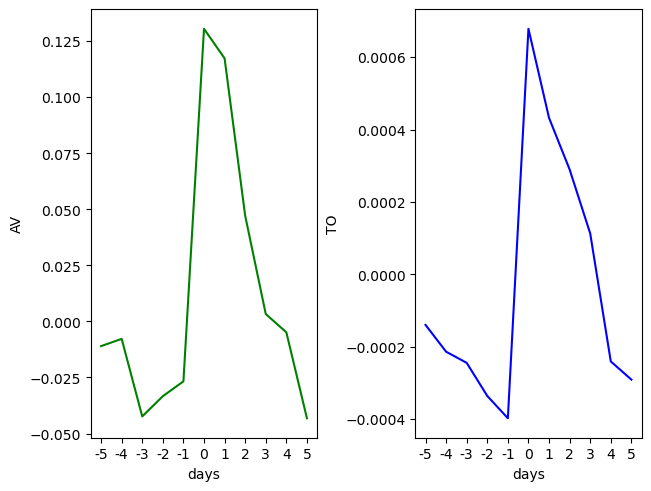

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout = True)
axes[0].plot(columns, s_av, color='green') #, linestyle='dashed'
axes[0].set_xlabel('days')
axes[0].set_ylabel('AV')
axes[1].plot(columns, s_to, color='blue') #, linestyle='dashed'
axes[1].set_xlabel('days')
axes[1].set_ylabel('TO')
plt.show()

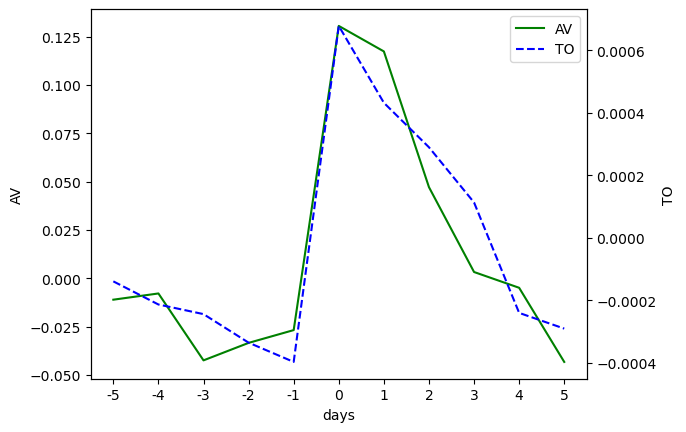

In [112]:
fig, axes = plt.subplots()

line1 = axes.plot(columns, s_av, color='green', label='AV') #, linestyle='dashed'
axes.set_xlabel('days')
axes.set_ylabel('AV')

axes1 = axes.twinx()
line2 = axes1.plot(columns, s_to, color='blue', label='TO', linestyle='dashed') #, 
axes1.set_xlabel('days')
axes1.set_ylabel('TO')

lines = line1 + line2
labels = [l.get_label() for l in lines]
axes.legend(lines, labels)
plt.show()

In [101]:
[l.get_label() for l in lines]

['AV', 'TO']

### BSI 대상 그림

In [79]:
col_bsi_ind = ['BSI_IND_'+str(i) for i in range(-5,5+1)]
col_bsi_ins = ['BSI_INS_'+str(i) for i in range(-5,5+1)]
col_bsi_for = ['BSI_FOR_'+str(i) for i in range(-5,5+1)]
s_bsi_ind = np.array([])
s_bsi_ins = np.array([])
s_bsi_for = np.array([])

for i in col_bsi_ind:
    s_bsi_ind = np.append(s_bsi_ind, wins(df_tot, i).mean())
for i in col_bsi_ins:
    s_bsi_ins = np.append(s_bsi_ins, wins(df_tot, i).mean())
for i in col_bsi_for:
    s_bsi_for = np.append(s_bsi_for, wins(df_tot, i).mean())    
# s_bsi_ind = df_tot[['BSI_IND_'+str(i) for i in range(-5,5+1)]].mean().values
# s_bsi_ins = df_tot[['BSI_INS_'+str(i) for i in range(-5,5+1)]].mean().values
# s_bsi_for = df_tot[['BSI_FOR_'+str(i) for i in range(-5,5+1)]].mean().values
columns = [str(i) for i in range(-5,5+1)]

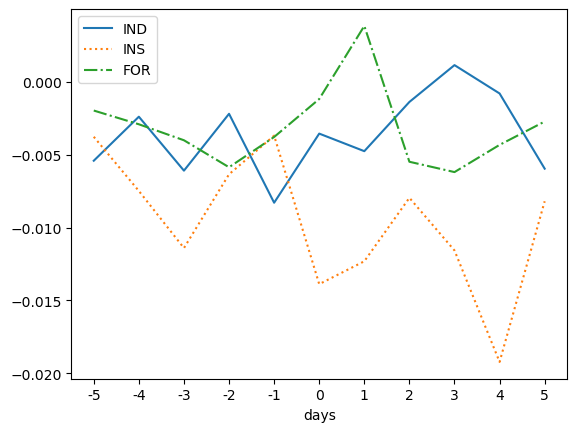

In [114]:
plt.plot(columns, s_bsi_ind)
plt.plot(columns, s_bsi_ins, linestyle='dotted')
plt.plot(columns, s_bsi_for, linestyle='dashdot')
plt.xlabel('days')
plt.legend(['IND','INS','FOR'])
plt.show()